## Tutorial :4
### Creating Custom Dataset under PyTorch 
### All code will be available at the following URL.

### URL (Jupyter Notebook): https://github.com/mrdbourke/pytorch-deep-learning/blob/main/04_pytorch_custom_datasets.ipynb
### URL (Online Ref Book): https://www.learnpytorch.io/04_pytorch_custom_datasets/
### URL (Torch Datasets): https://pytorch.org/vision/stable/datasets.html

### torch.utils.data.Dataset: Functions for manipulating data 
### torch.utils.data.DataLoader: Creates a Python iterable (Batches) over a dataset
### Custom Data sets are inevitable for special purpose applications. You need to 
### sub-class from torch.utils.Dataset.  

### Goal: Use torchvision.datasets as well as sub-classes of torch.utils.Dataset for converting custom data into torch connsumable Datasets. 


In [1]:
# Loading pytorch and associated libraries. 
import torch 
from torch import nn 

from torch.utils.data import DataLoader,  Dataset
from torchvision import datasets, transforms 

import json
import zipfile 

import os

import pathlib 
from pathlib import Path

import requests

import random
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt

from typing import Tuple, Dict, List

torch.version: 1.11.0

device_tag: cuda

device_cnt: 1

device_names: ['NVIDIA GeForce RTX 3080 Laptop GPU']

FetchDataFromURL: loc_image_path = data\pizza_steak_sushi
Directory (data\pizza_steak_sushi) already exists. Skipping downloading ...

Main1: loc_image_path = data\pizza_steak_sushi
DIR: C:\Users\ghosh\ParthaJupyterNBs\PyTorchTutorials\data\pizza_steak_sushi has 2 directories and 0 files.
DIR: C:\Users\ghosh\ParthaJupyterNBs\PyTorchTutorials\data\pizza_steak_sushi\test has 3 directories and 0 files.
DIR: C:\Users\ghosh\ParthaJupyterNBs\PyTorchTutorials\data\pizza_steak_sushi\test\pizza has 0 directories and 25 files.
DIR: C:\Users\ghosh\ParthaJupyterNBs\PyTorchTutorials\data\pizza_steak_sushi\test\steak has 0 directories and 19 files.
DIR: C:\Users\ghosh\ParthaJupyterNBs\PyTorchTutorials\data\pizza_steak_sushi\test\sushi has 0 directories and 31 files.
DIR: C:\Users\ghosh\ParthaJupyterNBs\PyTorchTutorials\data\pizza_steak_sushi\train has 3 directories and 0 files.
DIR: C:\Users

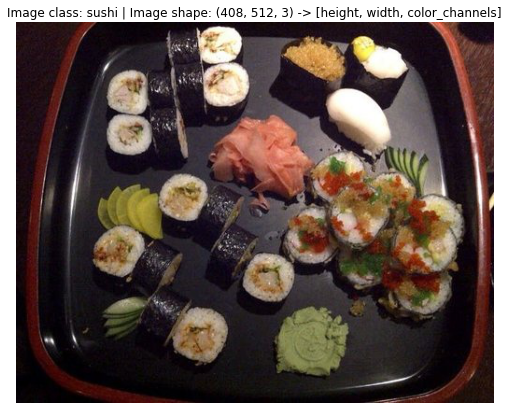

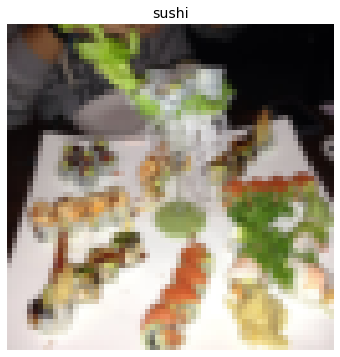

In [2]:
#
# Create device agnostic code framework. 
#

#
# Get device details in a json: 
# {'cuda': True/False, 'num_cuda_devices': ?, 'device_names': ['dev1', ...]}
#
def GetCudaDetails()-> str :
    # Initialize parameters 
    device_tag = "cpu"
    cuda_device_count = 0 
    cuda_dev_names = []

    # Regular Code segment for creating Device Agnostic code. 
    if (torch.cuda.is_available()==True): 
        device_tag = "cuda"    
        # How many CUDA devices exist? Get their names too. 
        cuda_device_count = torch.cuda.device_count()

        # Retrieve device names.
        cuda_dev_names = []
        for i in range(cuda_device_count):
            dev_name = torch.cuda.get_device_name(i)
            cuda_dev_names.append(dev_name)
        
    # Construct the response object
    return({"device_tag":device_tag, 
            "cuda_device_count":cuda_device_count,
            "cuda_dev_names":cuda_dev_names })   

def FetchDataFromURL(rmtDataURL, rmtDataZipFileName, locBaseDir, locDataSubDir)->Path:
    """
    Retrieves zipped image files from a remote URL and stores data into 
    local directory.
    
    Args:
        rmtDataURL : URL of data source. 
        rmtDataZipFileName: Name of zipped data fille. 
        locBaseDir: Base top level directory to store data. 
        locDataSubDir: The actual sub-directory where data is stored. 
    
    Returns: 
        None.
    """
    loc_data_path = Path(locBaseDir)
    loc_image_path = loc_data_path / locDataSubDir
    
    print(f"FetchDataFromURL: loc_image_path = {loc_image_path}")
    
    # Check if dst directory exists. If not, create one. 
    if (loc_image_path.is_dir() == True):
        print(f"Directory ({loc_image_path}) already exists. Skipping downloading ...\n")
    else:
        print(f"Directory ({loc_image_path}) doesn't exist. Creating one ...\n")
        loc_image_path.mkdir(parents=True, exist_ok=True)
   
        # Access remote zip file, transfer contents and write to local file. 
        loc_zip_file = loc_data_path / rmtDataZipFileName
        rmt_zip_file = rmtDataURL +"/"+rmtDataZipFileName

        with open(loc_zip_file, "wb") as f:
            response = requests.get(rmt_zip_file)
            print(f"Downloading contents from {rmt_zip_file}...")
            f.write(response.content)

        print("Downloading over ...")    
        
        # Unzip the file to get the image files
        with zipfile.ZipFile(loc_zip_file,"r") as zipref:
            print(f"Extracting all files from {loc_zip_file} into {loc_image_path} ...")
            zipref.extractall(loc_image_path)

        print("File extraction over ...") 
        
    return (loc_image_path)
        
    pass 


def TransformImageData (imgPath: Path) -> None: 
    """
    Prepares data for training, testing. 
    Args:
        imgPath: Directory where images are kept under train & test folders.
    Returns:
        None
    """
    
    img_path = Path(imgPath)
    train_dir = img_path / "train" 
    test_dir = img_path / "test"
    
    random_seed = 42
    
    # Select a random image 
    img_path_list = list(imgPath.glob("*/*/*.jpg"))
    random.seed(random_seed)
    rnd_img_path = random.choice(img_path_list)
    rnd_img_class = rnd_img_path.parent.stem 
    
    # Plot the image with image class  
    rnd_img = Image.open(rnd_img_path)
    
    # Print metadata
    print(f"Random image path: {rnd_img_path}")
    print(f"Image class: {rnd_img_class}")
    print(f"Image height: {rnd_img.height}") 
    print(f"Image width: {rnd_img.width}")
    
    # Convert and plot 
    rnd_img_np_array = np.asarray(rnd_img)
    plt.figure(figsize=(10, 7))
    plt.imshow(rnd_img_np_array)
    plt.title(f"Image class: {rnd_img_class} | Image shape: {rnd_img_np_array.shape} -> [height, width, color_channels]")
    plt.axis(False);
    plt.show() 
    
    pass 


# Directory walk through routine. 
def DirWalkThrough (dirName):     
    for dirpath,dirnames,filenames in  os.walk(dirName):
        print(f"DIR: {dirpath} has {len(dirnames)} directories and {len(filenames)} files.")

        

def FindClasses (dirName:str) -> Tuple[List[str], Dict[str,int]] : 
    
    class_names = sorted(list(entry.name for entry in os.scandir(dirName)))
    
    if (class_names==None):
        raise FileNotFoundError(f"Couldn't find any classes in {dirName}")
       
    class_dict = {name: id for id,name in enumerate(class_names)}
    
    return(class_names, class_dict)
    pass 


# Create custom data set 
class CustomDataset (Dataset):
    
    # Constructor
    def __init__(self, tgtDir:str, transformFunc=None) -> None:
        
        # Create list of image files
        self._transform = transformFunc 
        
        # Create image path directory
        self.paths = list (Path(tgtDir).glob("*/*.jpg")) 
        
        # Create labels & dictionary 
        self._classes, self._class_to_idx = FindClasses(tgtDir)
        pass  

    # Return an image indexed by the argument. 
    def load_image(self,index:int) -> Image.Image:
        img_path = self.paths[index]
        img=Image.open(img_path)
        return(img)
    
    # Get number of samples
    def __len__(self): 
        "Returns total number of samples."
        length = len(self.paths) 
        return(length)
    
    #
    # Get a specific item (index) from corpus. 
    # This method triggered when Custom Data Set is instantiated and index as XXX[index].
    #
    def __getitem__(self,index:int) -> Tuple[torch.Tensor,int] :
        # Get image at index. Then transform the same. 
        img = self.load_image(index)
        
        # Extract the label.
        img_label = self.paths[index].parent.name
        img_lbl_idx = self._class_to_idx[img_label]
        
        # Return the tuple. 
        if (self._transform == None): 
            return (img, img_lbl_idx)
        else:
            return (self._transform(img), img_lbl_idx)    
    pass


#
# Main routine. Min required is 1.10.0 
#
print(f"torch.version: {torch.__version__}")

# Check PyTorch version 
print()
resp_dict = GetCudaDetails() 
print(f"device_tag: {resp_dict['device_tag']}\n")
print(f"device_cnt: {resp_dict['cuda_device_count']}\n")
print(f"device_names: {resp_dict['cuda_dev_names']}\n")

# Load data from remote URL
rmt_URL= "https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/"
rmt_data_zip_file_name= "pizza_steak_sushi.zip"
loc_base_dir= "data"
loc_data_sub_dir = "pizza_steak_sushi"
loc_image_path = FetchDataFromURL(rmt_URL, rmt_data_zip_file_name, loc_base_dir, loc_data_sub_dir)

print(f"Main1: loc_image_path = {loc_image_path}")

base_dir = "C:\\Users\\ghosh\\ParthaJupyterNBs\\PyTorchTutorials\\data\\"+loc_data_sub_dir
DirWalkThrough(base_dir)  

print(f"Main2: loc_image_path = {loc_image_path}")

TransformImageData(loc_image_path)


train_dir =  Path(base_dir) / "train"
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])
train_cust_data_set = CustomDataset(train_dir,train_transforms)
train_class_names = train_cust_data_set._classes


test_dir =  Path(base_dir) / "test"
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])
test_cust_data_set = CustomDataset(test_dir,test_transforms)
test_class_names = test_cust_data_set._classes


# Show the random train image
img_index =200
img, img_idx = train_cust_data_set[img_index]
img_label = train_class_names[img_idx]
img_permute = img.permute(1,2,0)

plt.figure(figsize=(10,6))
plt.imshow(img_permute)
plt.axis("off")
plt.title(img_label,fontsize=14)
plt.show()


#
# Create DataLoaders 
#
# pin_memory: For GPU usage, this will force DataLoader to allocate data in 
# pinned (page locked) memory for faster execution. 
#
train_data_loader = DataLoader(dataset=train_cust_data_set, 
                               batch_size=1, num_workers=1, 
                               pin_memory=True, shuffle=True)
test_data_loader = DataLoader(dataset=test_cust_data_set, 
                               batch_size=1, num_workers=1, 
                               pin_memory=True, shuffle=True)

